## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [83]:
df = pd.read_csv("QueryResults.csv", header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [84]:
print(df.head())
print(df.tail())

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                     DATE    TAG  POSTS
1986  2020-07-01 00:00:00      r   5694
1987  2020-07-01 00:00:00     go    743
1988  2020-07-01 00:00:00   ruby    775
1989  2020-07-01 00:00:00   perl    182
1990  2020-07-01 00:00:00  swift   3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [85]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [86]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [87]:
df.groupby('TAG')['POSTS'].sum().sort_values(ascending=False)

TAG
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [88]:
df.groupby('TAG').count().sort_values(by='DATE')

,DATE,POSTS
TAG,,
go,129,129
swift,135,135
r,142,142
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [90]:
df['DATE'] = df['DATE'].str.replace(" 00:00:00", "")
print(df.head())

         DATE         TAG  POSTS
0  2008-07-01          c#      3
1  2008-08-01    assembly      8
2  2008-08-01  javascript    162
3  2008-08-01           c     85
4  2008-08-01      python    124


In [91]:
df.DATE = pd.to_datetime(df.DATE)

In [92]:
print(type(df.DATE[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Data Manipulation



In [93]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
# in .pivot() index represents name of rows, columns name of columns and values cell values

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [95]:
reshaped_df.shape

(145, 14)

In [98]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [99]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [102]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [103]:
reshaped_df.fillna(0, inplace=True)
# inplace argument means we are updating existing reshaped_df

In [105]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [107]:
# to check if there is any NAN in values (cells) we use .isna() like in the code bellow
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [108]:
import matplotlib.pyplot as plt

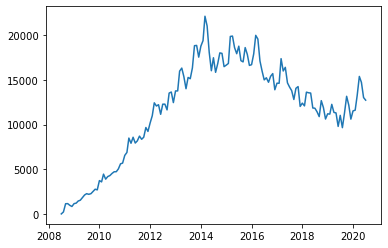

In [148]:
# plt.plot(x, y)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

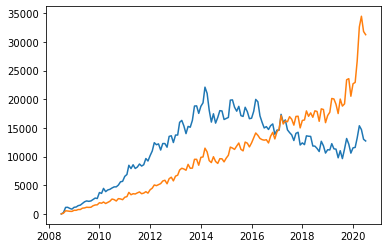

In [150]:
# plt.plot(x1, y1, y2)
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)

<h3>Styling the Chart</h3>

<strong>.figure()</strong> - allows us to resize our chart

<strong>.xticks()</strong> - configures our x-axis

<strong>.yticks()</strong> - configures our y-axis

<strong>.xlabel()</strong> - add text to the x-axis

<strong>.ylabel()</strong> - add text to the y-axis

<strong>.ylim()</strong> - allows us to set a lower and upper bound

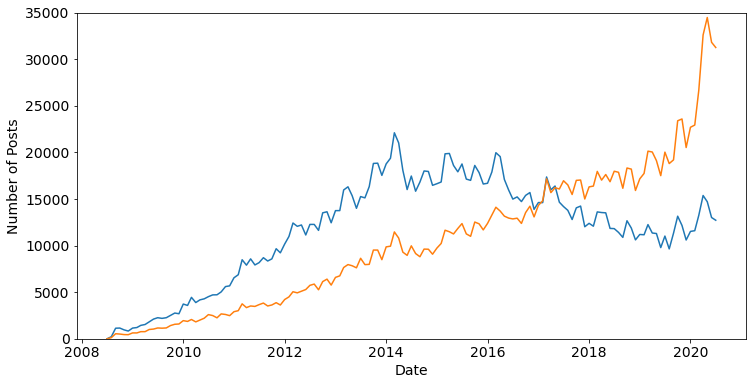

In [160]:
# increase plot size
plt.figure(figsize=(12,6))
# plt.figure(figsize=(width, height))

#increase ticks font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# adding labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

#setting lower and upper limit of y-axis
plt.ylim(0, 35000)

# ploting data
plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)

<h3>Ploting all the programming languages</h3>

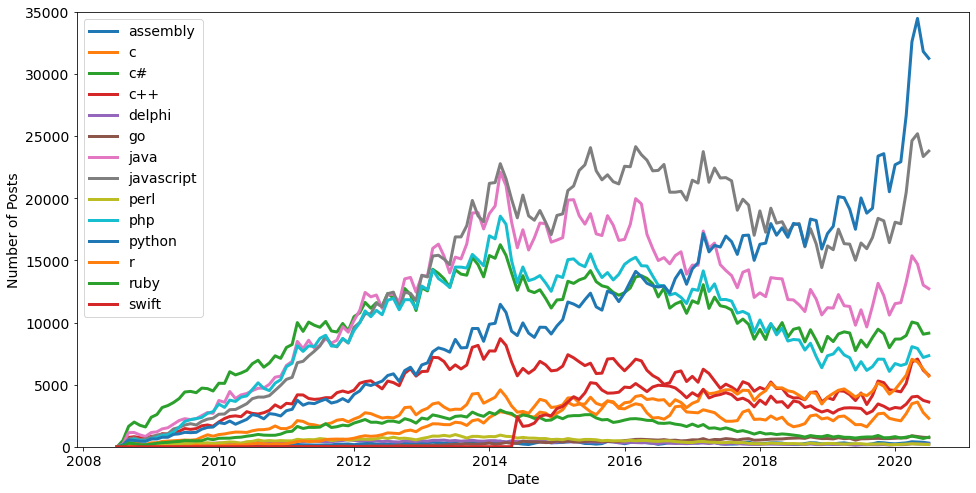

In [171]:
# increase plot size
plt.figure(figsize=(16,8))
# plt.figure(figsize=(width, height))

#increase ticks font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# adding labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

#setting lower and upper limit of y-axis
plt.ylim(0, 35000)

# plot all languages using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
    # linewidth adds thickness to the lines
    # label gets the names of the programming languages to use it in legend

# ploting legend
plt.legend(fontsize=14) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [184]:
roll_df = reshaped_df.rolling(window=6).mean()
# window represents the amount of sequential values
# smaller window --> average calculated from less values --> more spikes
# bigger window --> avaerage calculated from more values --> less spikes / smoother lines

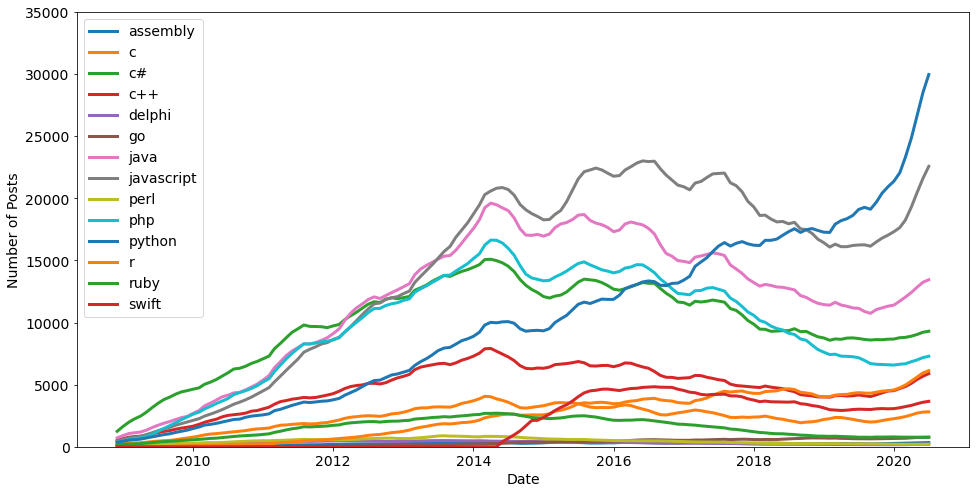

In [185]:
# increase plot size
plt.figure(figsize=(16,8))
# plt.figure(figsize=(width, height))

#increase ticks font size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# adding labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

#setting lower and upper limit of y-axis
plt.ylim(0, 35000)

# plot all languages using for loop
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], linewidth=3, label=reshaped_df[column].name)
    # linewidth adds thickness to the lines
    # label gets the names of the programming languages to use it in legend

# ploting legend
plt.legend(fontsize=14)

<h3>Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've</h3>

<ul>
<li>
    used <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">.groupby()</a></strong> 
    to explore the number of posts and entries per programming language
</li>
<li>
    converted strings to Datetime objects with 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html">.to_datetime()</a>
    </strong> 
    for easier plotting
</li>
<li>
    reshaped our DataFrame by converting categories to columns using 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html">.pivot()</a></strong>
</li>
<li>
    used 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html">.count()</a></strong> and 
    <strong>isna().values.any()</strong>
    to look for NaN values in our DataFrame, which we then replaced using 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html">.fillna()</a></strong>
</li>
<li>
    created (multiple) line charts using 
    <strong><a href="https://matplotlib.org/3.5.0/tutorials/introductory/pyplot.html">.plot()</a></strong> 
    with a for-loop
</li>
<li>
    styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.
</li>
<li>
    added a legend to tell apart which line is which by colour
</li>
<li>
    smoothed out our time-series observations with 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html">.rolling()</a></strong>
    and 
    <strong><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html">.mean()</a></strong> and 
    plotted them to better identify trends over time.
</li>
</ul>